In [15]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

In [16]:
species = {S.name: S for S in ct.Species.list_from_file("gri30.yaml")}

# Create an IdealGas object with species representing complete combustion - 100atm
complete_species = [species[S] for S in ("C3H8", "O2", "N2", "CO2", "H2O")]

#creating an array of varying values of equivalence ratio from 0.5 to 1.5 to loop through
phi = np.linspace(0.5, 1.5, 100)

## Isobaric Adiabatic Combustion(HP) and Isochoric Adiabatic Combustion(UV)

In [18]:
#for 300 and 1atm
gas1 = ct.Solution(thermo="ideal-gas", species=complete_species)
T1 = np.zeros(phi.shape)
for i in range(len(phi)):
    gas1.TP = 300, 1e5
    gas1.set_equivalence_ratio(phi[i], "C3H8", "O2:1, N2:3.76")
    gas1.equilibrate("HP")
    T1[i] = gas1.T

#for 300 and 10atm
gas2 = ct.Solution(thermo="ideal-gas", species=species.values())
T2 = np.zeros(phi.shape)
for i in range(len(phi)):
    gas2.TP = 300, 1e6
    gas2.set_equivalence_ratio(phi[i], "C3H8", "O2:1, N2:3.76")
    gas2.equilibrate("HP")
    T2[i] = gas2.T
    
#-----------------------UV------------------------------------------#

#for 300 and 1atm
gas3 = ct.Solution(thermo="ideal-gas", species=complete_species)
T3 = np.zeros(phi.shape)
for i in range(len(phi)):
    gas3.TP = 300, 1e5
    gas3.set_equivalence_ratio(phi[i], "C3H8", "O2:1, N2:3.76")
    gas3.equilibrate("UV")
    T3[i] = gas3.T

#for 300 and 10atm
gas4 = ct.Solution(thermo="ideal-gas", species=species.values())
T4 = np.zeros(phi.shape)
for i in range(len(phi)):
    gas4.TP = 300, 1e6
    gas4.set_equivalence_ratio(phi[i], "C3H8", "O2:1, N2:3.76")
    gas4.equilibrate("UV")
    T4[i] = gas4.T

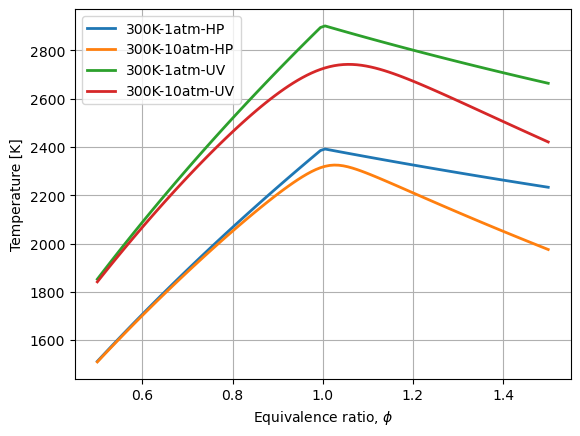

In [19]:
plt.plot(phi, T1, label="300K-1atm-HP", lw=2)
plt.plot(phi, T2, label="300K-10atm-HP", lw=2)
plt.plot(phi, T3, label="300K-1atm-UV", lw=2)
plt.plot(phi, T4, label="300K-10atm-UV", lw=2)
plt.grid(True)
plt.legend()
plt.xlabel("Equivalence ratio, $\phi$")
plt.ylabel("Temperature [K]");